<a href="https://colab.research.google.com/github/MaxenceAr/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic**

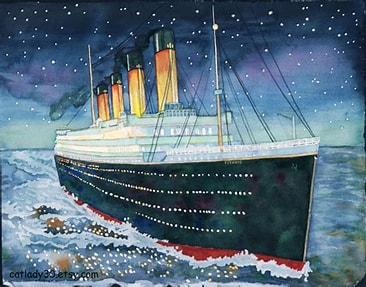

# Data description

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. Some duplicate passengers have been dropped, many errors corrected,and many missing ages have been filled in.

Our goal is to predict if a passenger would have been survive.
Below are the describtions of the columns.

survival (target) : 0 = died, 1 = survived

pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex : Sex

Age : Age in years

sibsp : number of siblings / spouses aboard the Titanic

parch : number of parents / children aboard the Titanic

ticket : Ticket number

fare : Passenger fare

cabin : Cabin number

boat : Life boat code (boat taken after the sinking)

embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

body : Body number (if did not survive and body was recovered)

# Importations

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml(data_id=40945, parser='auto')

# Data Exploratory Analysis

In [3]:
titanic, y = titanic.data, titanic.target
titanic.head(15)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


In [5]:
y = y.astype(int)

In [6]:
#We delete non intersting columns (name), or columns with too few values (cabin). We also delete body and boat because this columns are too tied with our target.
titanic=titanic.drop("name", axis=1)
titanic=titanic.drop("cabin", axis=1)
titanic=titanic.drop("body", axis=1)
titanic=titanic.drop("ticket", axis=1)
titanic=titanic.drop("boat", axis=1)

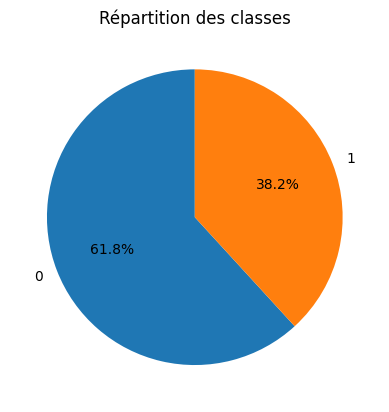

In [7]:
class_counts = y.value_counts()
#The ; at the end of the next lign delete a non interesting text
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90);
plt.title("Répartition des classes");


Our dataset is a little unbalanced

In [8]:
X_train, X_validation, y_train, y_validation = train_test_split(titanic, y, test_size=0.1, random_state=42)

## Look at categorical values

In [9]:
cat_features=["pclass","sex","embarked","home.dest"]

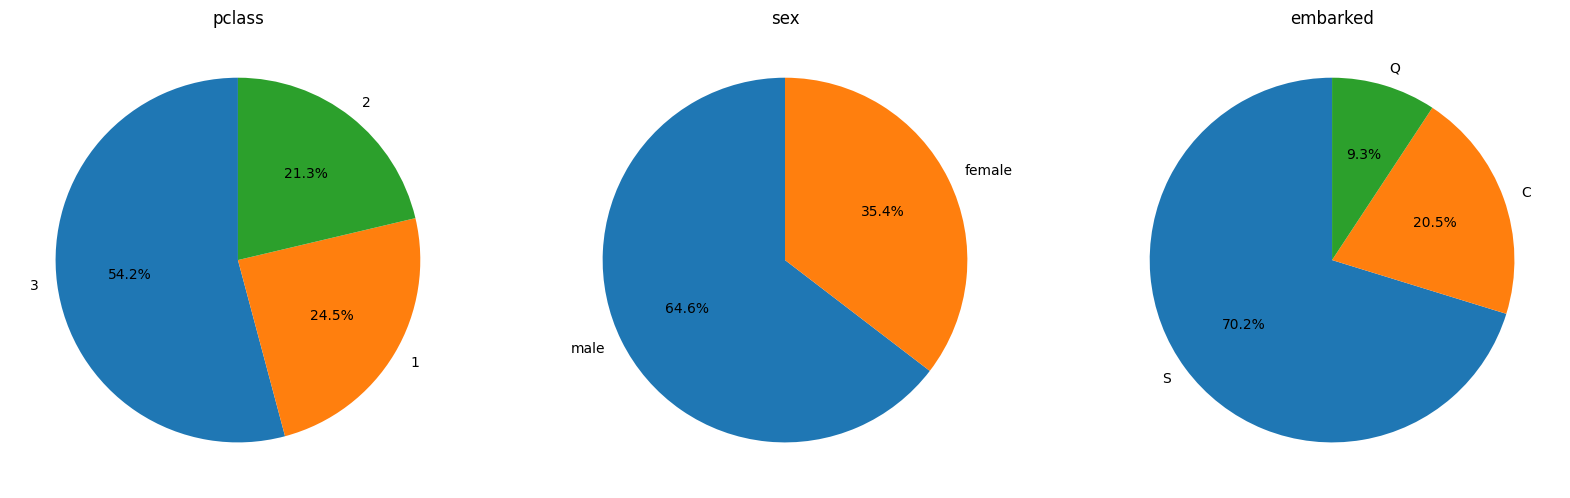

In [10]:
comptage_pclass = X_train['pclass'].value_counts()
etiquettes_pclass = comptage_pclass.index
valeurs_pclass = comptage_pclass.values

comptage_sex = X_train['sex'].value_counts()
etiquettes_sex = comptage_sex.index
valeurs_sex = comptage_sex.values

comptage_embarked = X_train['embarked'].value_counts()
etiquettes_embarked = comptage_embarked.index
valeurs_embarked = comptage_embarked.values


# Créez la figure avec une grille de sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(20, 8))  # 1 ligne, 2 colonnes (2 graphiques côte à côte)

#first sub figure
axs[0].pie(valeurs_pclass, labels=etiquettes_pclass, autopct='%1.1f%%', startangle=90)
axs[0].set_title('pclass')

#second sub figure
axs[1].pie(valeurs_sex, labels=etiquettes_sex, autopct='%1.1f%%', startangle=90)
axs[1].set_title('sex')

#third sub figure
axs[2].pie(valeurs_embarked, labels=etiquettes_embarked, autopct='%1.1f%%', startangle=90)
axs[2].set_title('embarked');



There are to much values in the column "home.dest" to print its pie.

In [11]:
X_train['home.dest'].value_counts()

New York, NY                            57
London                                  11
Paris, France                            9
Montreal, PQ                             9
Wiltshire, England Niagara Falls, NY     8
                                        ..
England Salt Lake City, Utah             1
Birkdale, England Cleveland, Ohio        1
Devonport, England                       1
Kontiolahti, Finland / Detroit, MI       1
West Hoboken, NJ                         1
Name: home.dest, Length: 342, dtype: int64

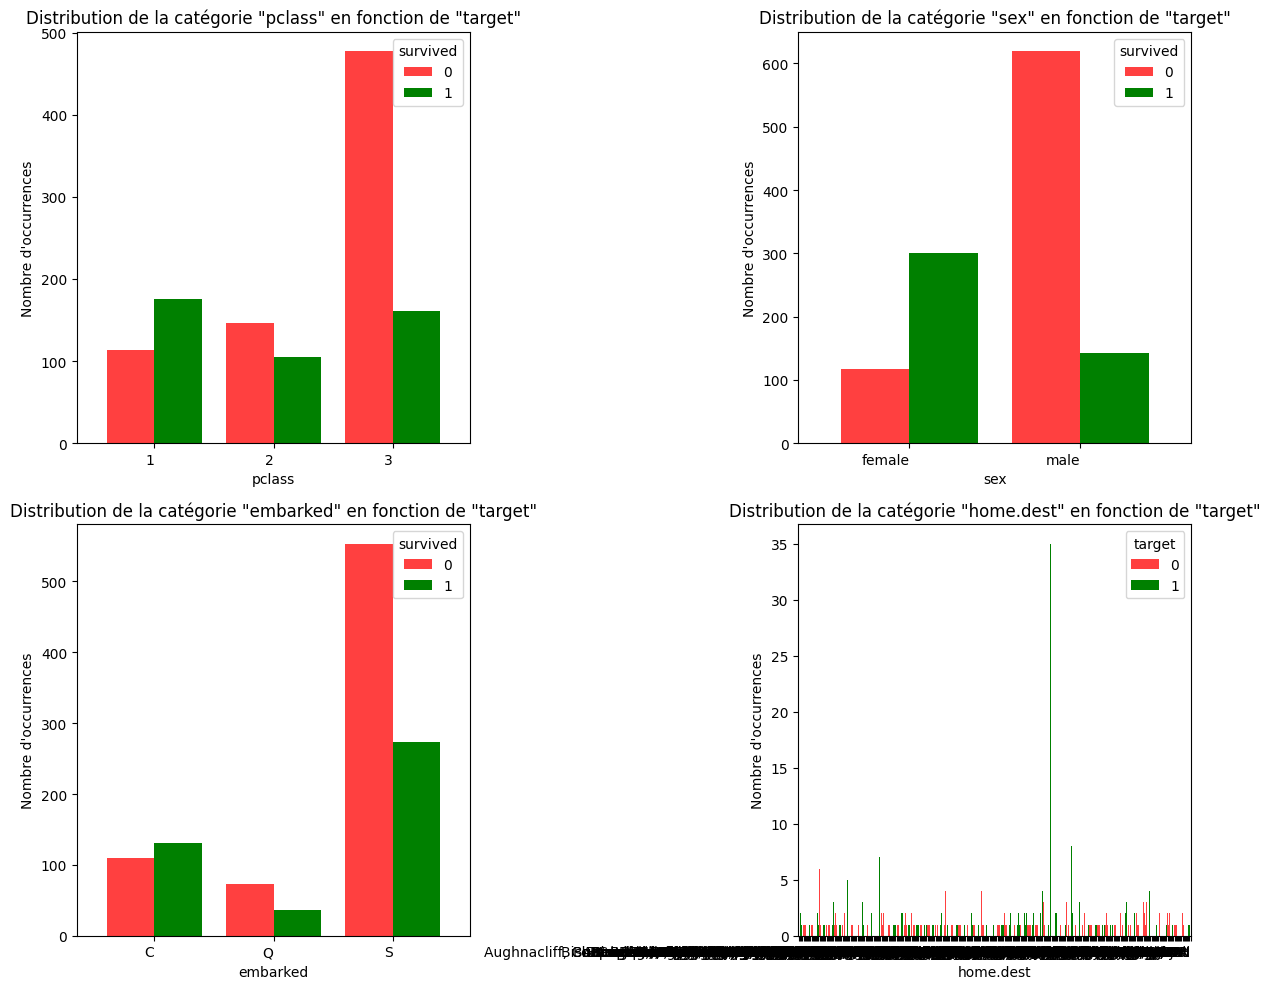

In [12]:
# Créez une figure avec une grille de sous-graphiques (2 lignes, 2 colonnes)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boucle à travers les quatre premières colonnes catégorielles
for i, column in enumerate(cat_features[:4]):
    # Exemple de données (assurez-vous que vos données contiennent des occurrences de chaque catégorie pour 0 et 1)
    cross_tab = pd.crosstab(X_train[column], y_train)

    # Calculez les indices de ligne et de colonne pour le sous-tracé actuel
    row_index = i // 2
    col_index = i % 2

    # Tracez les barres côte à côte
    cross_tab.plot(kind='bar', color=['#FF4040', '#008000'], ax=axs[row_index, col_index], width=0.8, legend=True)

    # Ajoutez des étiquettes et un titre
    axs[row_index, col_index].set_ylabel("Nombre d'occurrences")
    axs[row_index, col_index].set_title(f'Distribution de la catégorie "{column}" en fonction de "target"')

    # Modifiez l'orientation des étiquettes en x
    axs[row_index, col_index].set_xticklabels(axs[row_index, col_index].get_xticklabels(), rotation=0, ha="right")

# Ajoutez une légende pour les couleurs
axs[1, 1].legend(title='target')

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez le graphique
plt.show()







Without surprises, thez are more deads among the third class than in the first.
It's not really a surprise that more women survived than men, because of "galabterie".

However, it's suprised me that they are as many survivors among passengers from Cherbourg. Indeed, I know that they were a lot of immigrants (and thus of third class) from Cherbourg.

They are an impressive proportion of deads amonf people who were going to a certain town. But we can't read the name of this town on the graph.


In [13]:
df = pd.concat([X_train, y_train], axis=1)

df_class_1 = df[y_train == 1]

# Trouver la ville avec le nombre maximum d'occurrences
most_frequent_city = df_class_1['home.dest'].mode().iloc[0]

print(f"La ville associée le plus souvent à la classe '1' est : {most_frequent_city}")

La ville associée le plus souvent à la classe '1' est : New York, NY


Dans la cellule où on a uttilisé la commande head, on voit que tous les passagers visibles avec cette commandes allant à New-York étaient en 1ère classe. Si cela est vrai sur toutes les données, on comprend pourquoi il y a autant de survivants parmi les passagagers se rendant à New-York.

## Look at numeric values

In [14]:
num_features=["age","sibsp","parch","fare"]

In [24]:
num_features_without_parch=["age", "sibsp","fare"]

In [15]:
X_train.describe()

,pclass,age,sibsp,parch,fare
count,1178.000000,942.000000,1178.000000,1178.000000,1177.000000
mean,2.296265,29.665074,0.510187,0.397284,32.921803
std,0.836510,14.395953,1.049488,0.885103,50.649190
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.458300
75%,3.000000,38.875000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


We notice that most of passengers didn't travel with their chlidren or parents ("parch" feature). So , it's not interesting to draw the box plot of parch.

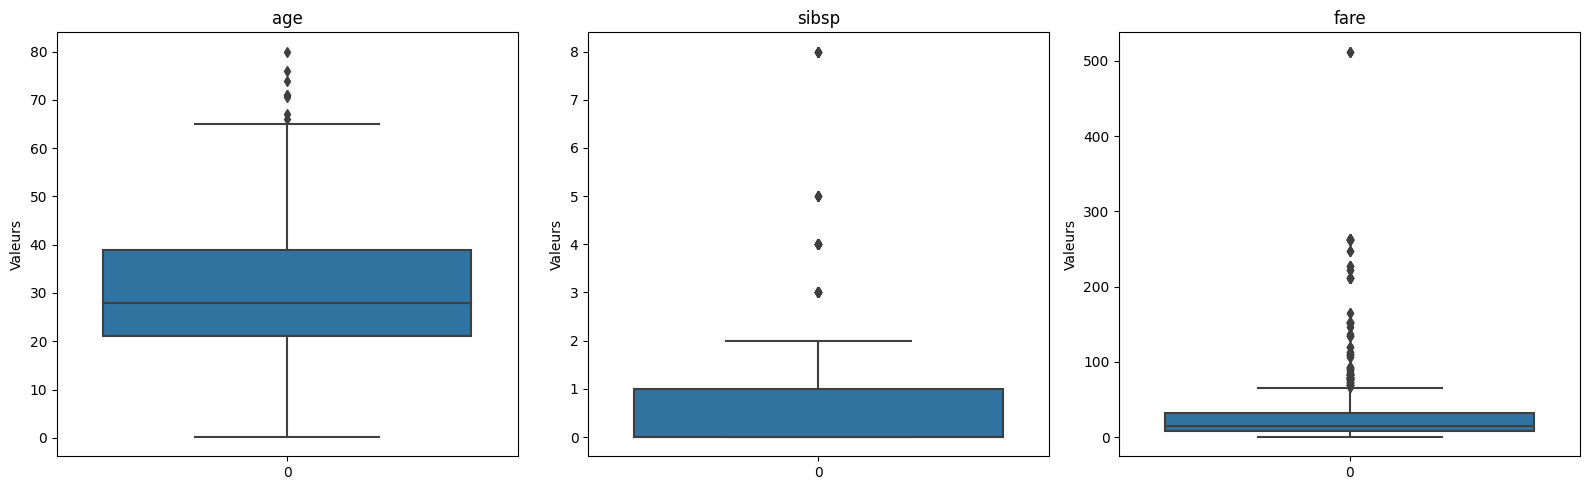

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # 1 ligne, 5 colonnes
for i, col in enumerate(X_train[num_features_without_parch].columns):
    sns.boxplot(data=X_train[num_features][col], orient="v", ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Valeurs')

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les sous-graphiques
plt.show()



There are not a lot of ouliners. Thus, we won't delete them.

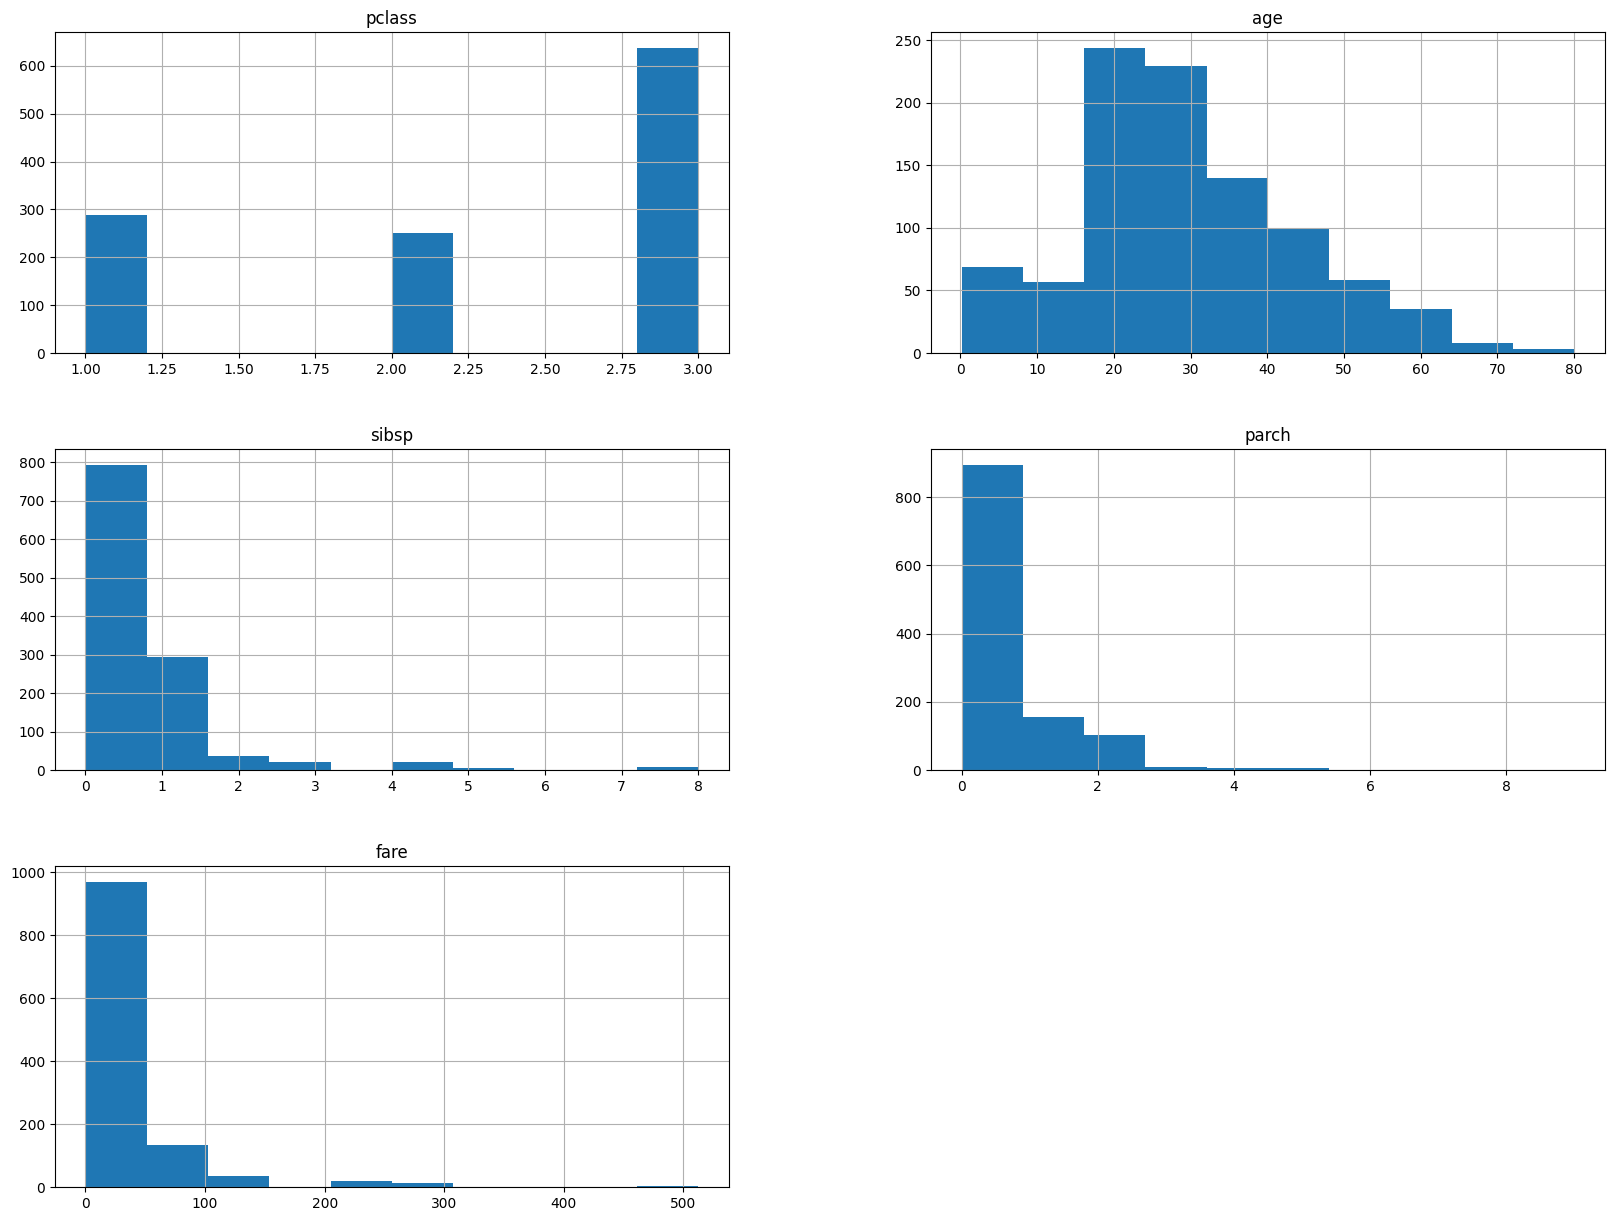

In [30]:
X_train.hist(figsize=(20,15))
plt.show()

None of the columns are capped.

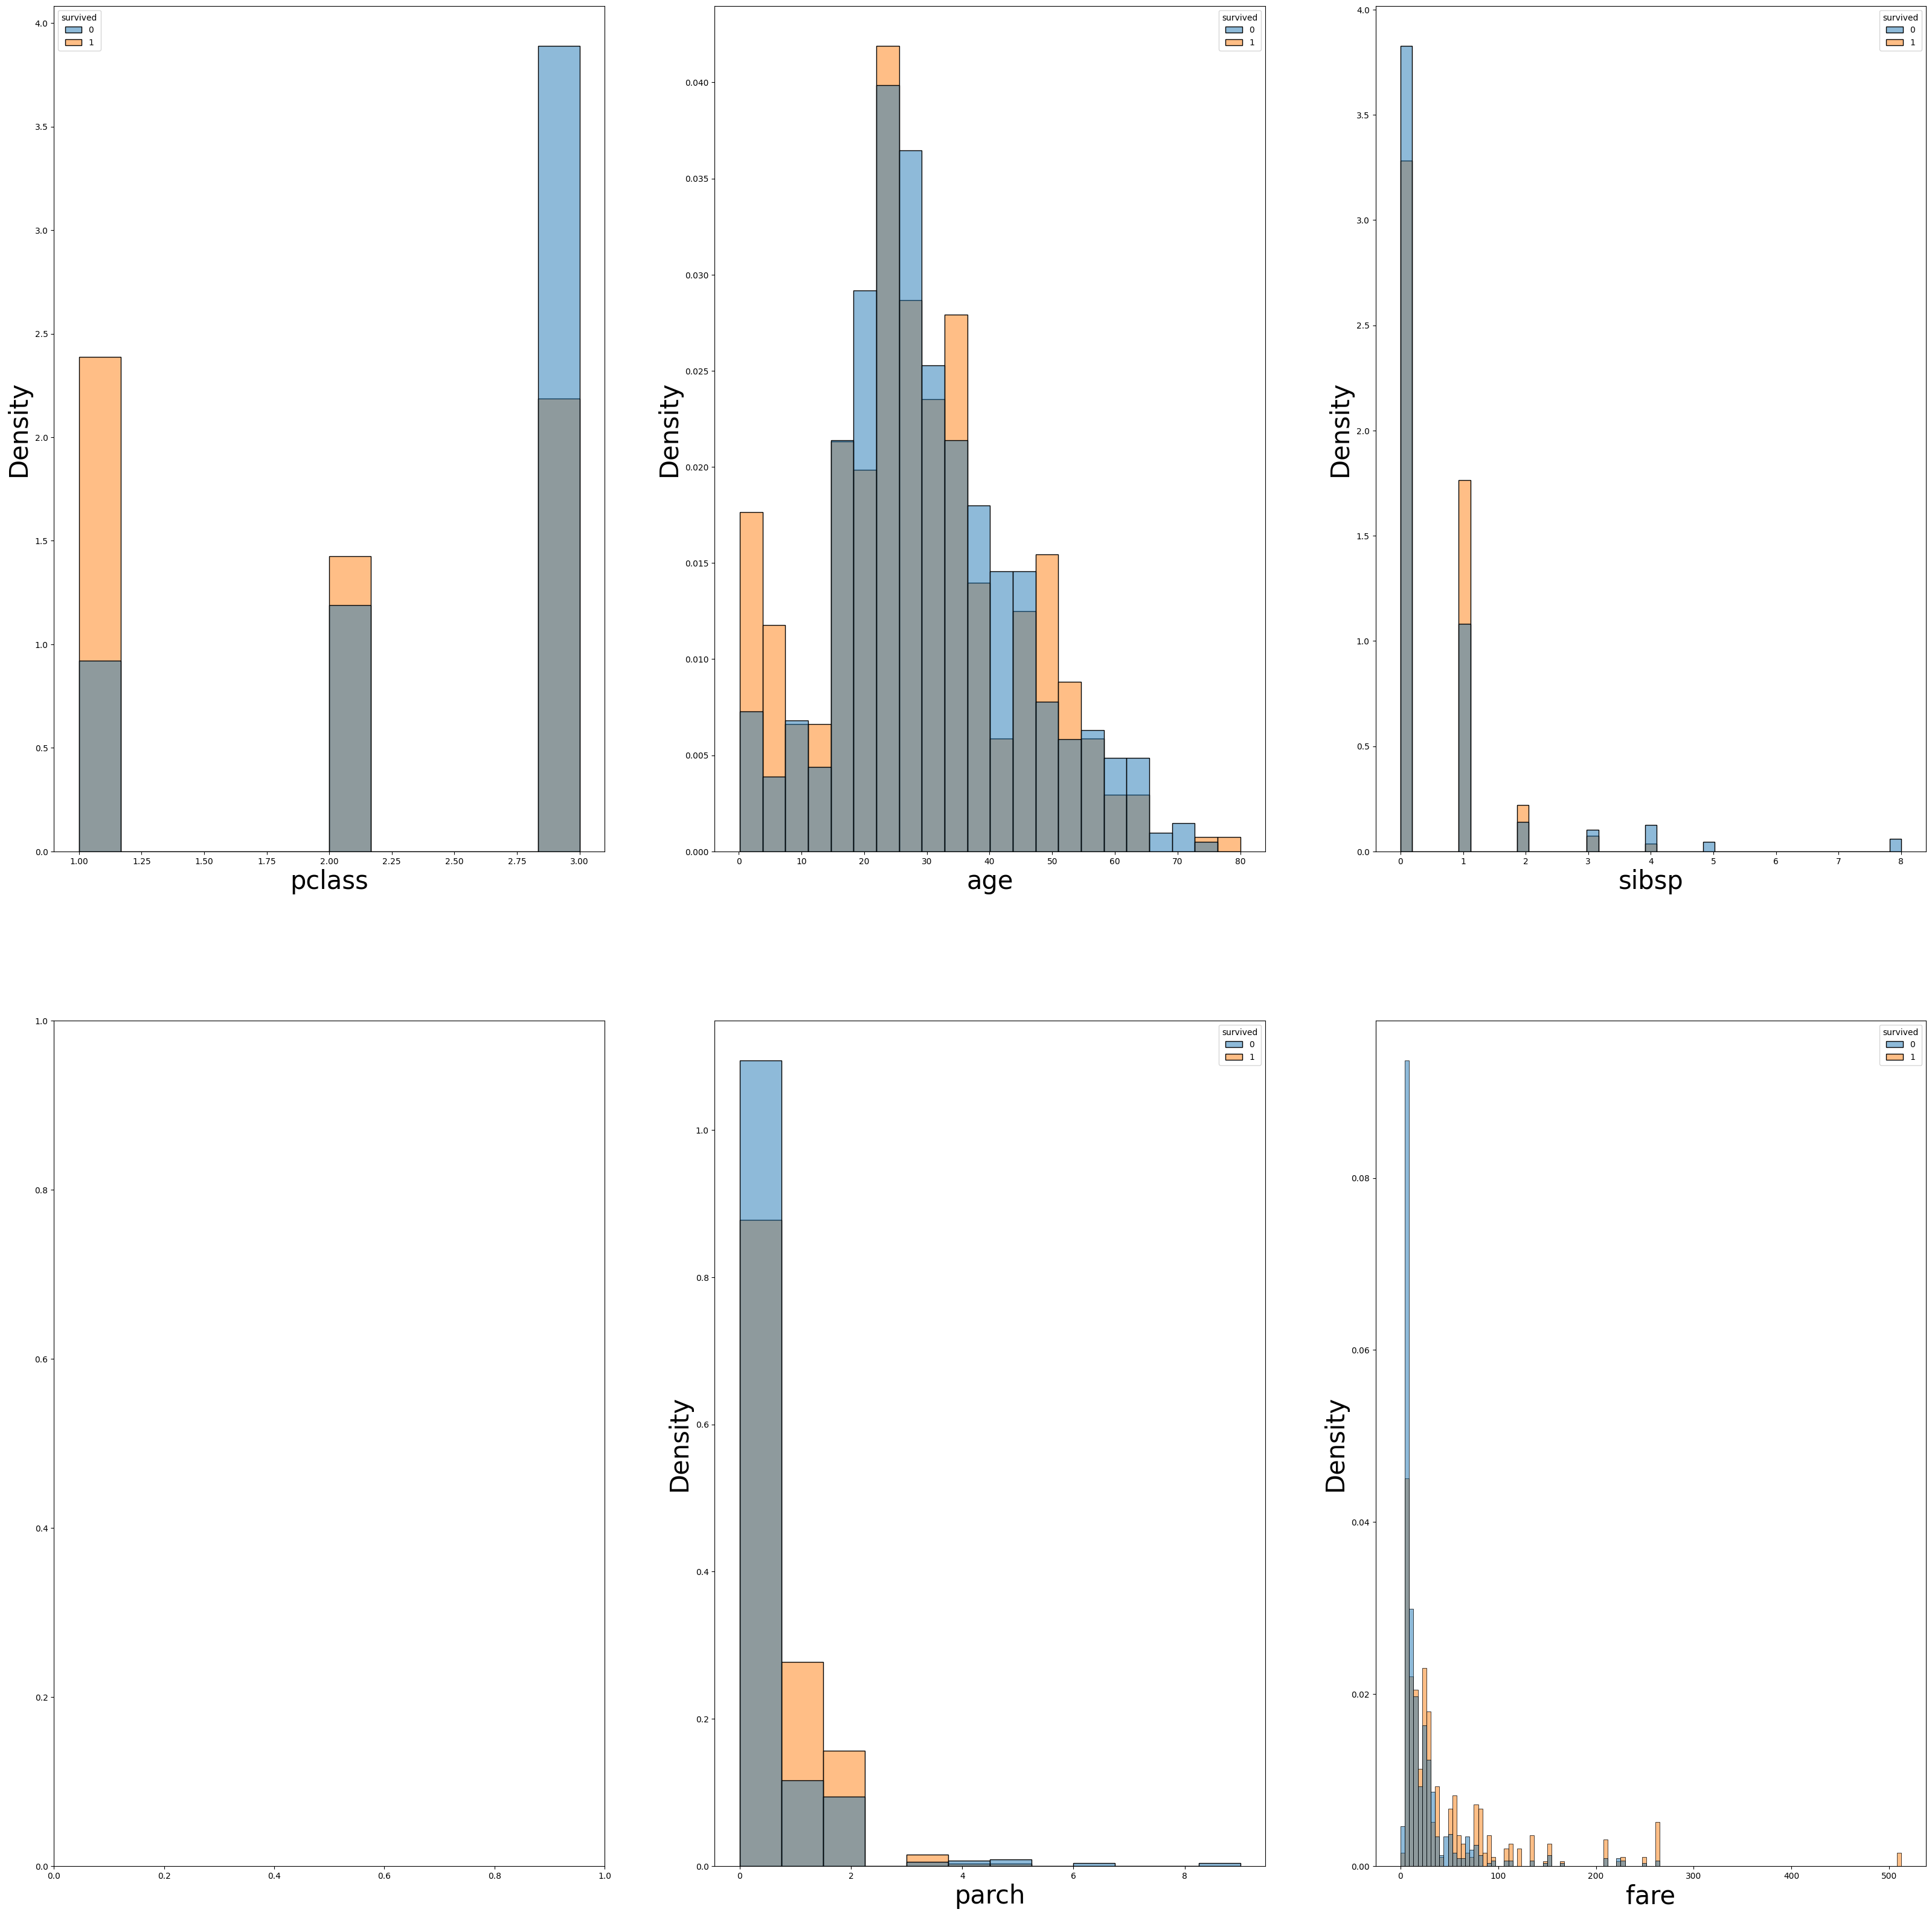

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(40, 40))  # Ajustez figsize selon vos besoins


sns.histplot(data=X_train, x='pclass', hue=y_train, stat="density", common_norm=False,ax=axs[0,0])
sns.histplot(data=X_train, x='age', hue=y_train, stat="density", common_norm=False,ax=axs[0,1])
sns.histplot(data=X_train, x='sibsp', hue=y_train, stat="density", common_norm=False,ax=axs[0,2])
sns.histplot(data=X_train, x='parch', hue=y_train, stat="density", common_norm=False, ax=axs[1,1])
sns.histplot(data=X_train, x='fare', hue=y_train, stat="density", common_norm=False,ax=axs[1,2])


for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=30)
    ax.set_ylabel(ax.get_ylabel(), fontsize=30)


plt.show()

Apart from 'pclass" and "fare", we don't see clear trends.

Now, we can check correlations to see wether somme colums hold the same information. If it is the case, we could remove them.

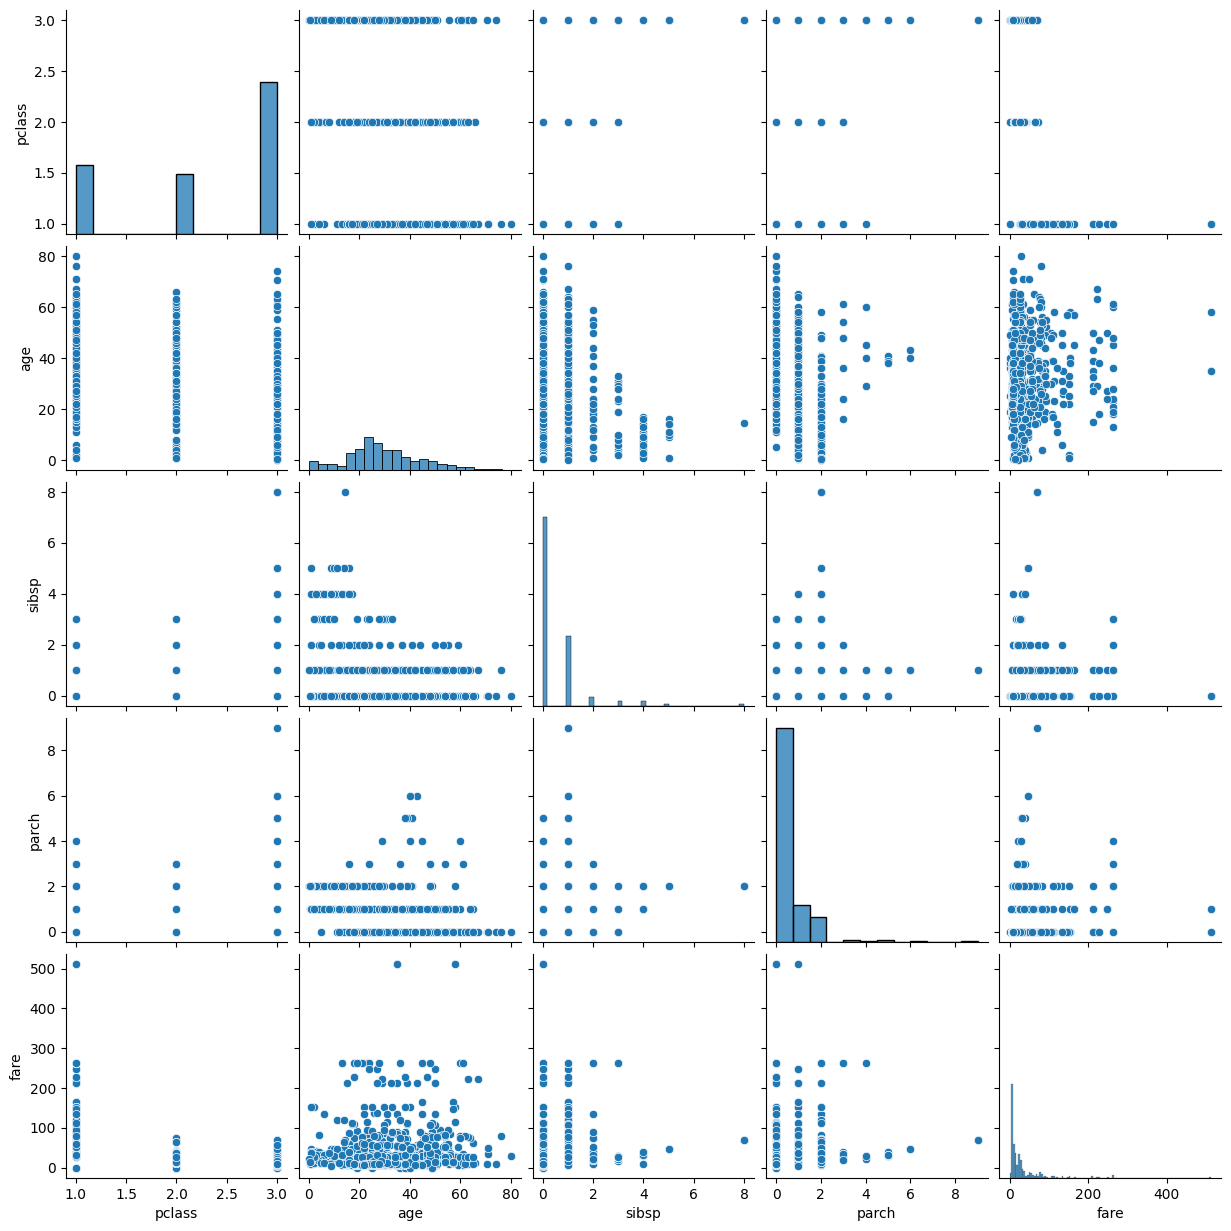

In [35]:
sns.pairplot(X_train)

            age     sibsp     parch      fare
age    1.000000 -0.253291 -0.178045  0.158576
sibsp -0.253291  1.000000  0.369729  0.174999
parch -0.178045  0.369729  1.000000  0.212356
fare   0.158576  0.174999  0.212356  1.000000


<Axes: >

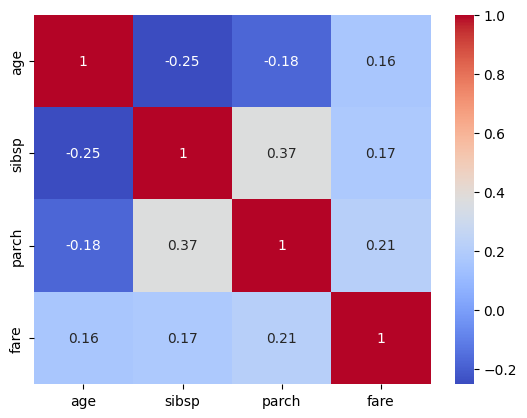

In [36]:
correlation_matrix = X_train[num_features].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

There is a slight correlation between "parch" and "sibsp". It's due to people who travelled in family. But this correlations is too little to delete one of this feature.

#Unsupervised exploration

Firstly, a PCA (Principal Component Analysis)



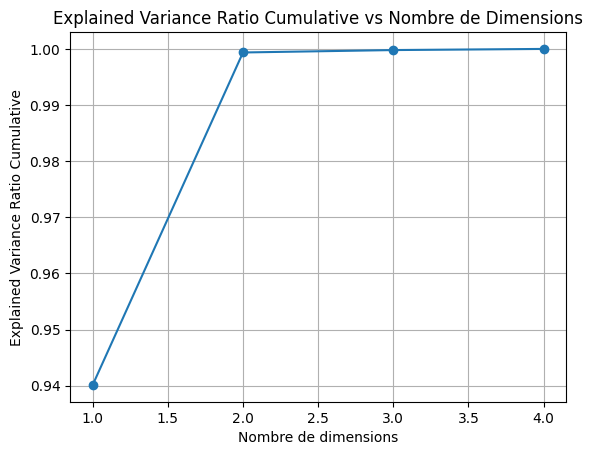

        age     sibsp     parch      fare
0  0.041113  0.003577  0.003677  0.999141
1  0.998885 -0.019255 -0.013317 -0.040985
2  0.023137  0.858158  0.512831 -0.005911
3  0.001498 -0.513013  0.858379 -0.001384


In [47]:
pca = PCA()
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train[num_features]), columns=X_train[num_features].columns)

X_num = X_train_imputed[num_features]

X_pca = pca.fit_transform(X_num)


explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Nombre de dimensions')
plt.ylabel('Explained Variance Ratio Cumulative')
plt.title('Explained Variance Ratio Cumulative vs Nombre de Dimensions')
plt.grid(True)
plt.show()


components = pca.components_
components_df = pd.DataFrame(components, columns=num_features)
print(components_df)

This schows that the most interesting part of the information for numerical features is contained in two variables: 'fare' and 'age'.

We will now see if the 'duration' and 'balance' variables can be used to naturally group the data into two distinct clusters, and then compare these clusters with the true labels to assess the performance of the clustering. This may give some indication of the separability of the classes in the chosen feature space.

I should do the same thing for categorigal features the day I will have the time.

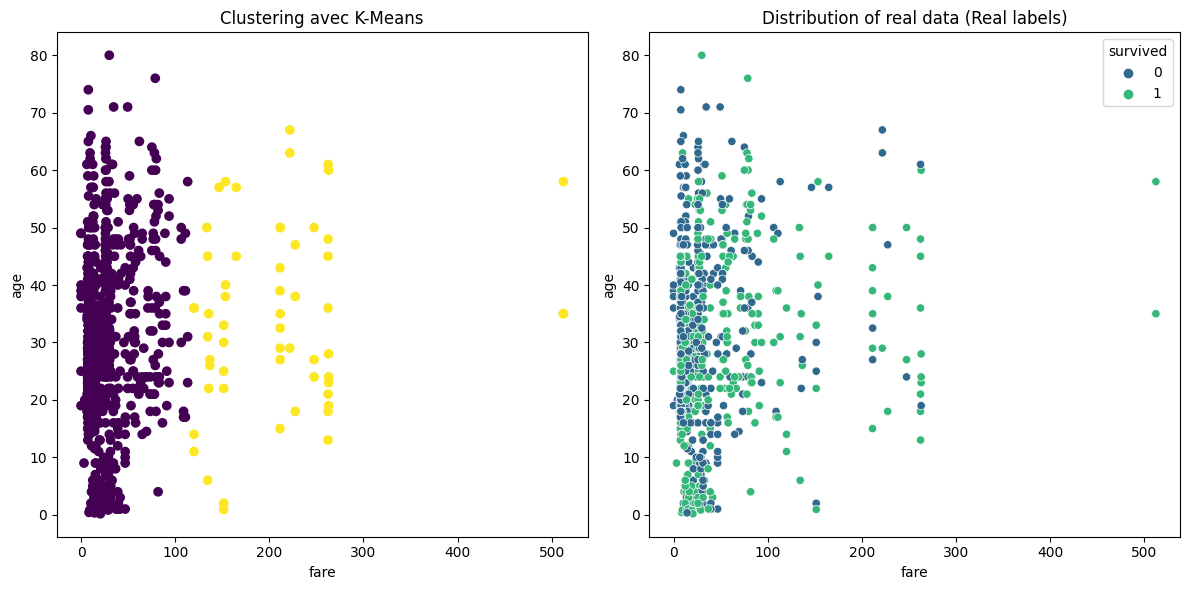

In [60]:
# Sélectionnez uniquement les colonnes de la liste num_features
selected_features = X_train_imputed


kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = kmeans.fit_predict(selected_features)
# Graphe 1 (K-Means)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train['fare'], X_train['age'], c=labels, cmap='viridis')
plt.title('Clustering avec K-Means')
plt.xlabel('fare')
plt.ylabel('age')

# Graphe 2 (Vraies étiquettes)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train['fare'], y=X_train['age'], hue=y_train, palette='viridis', legend='full')
plt.title('Distribution of real data (Real labels)')
plt.xlabel('fare')
plt.ylabel('age')

# Ajustez l'espace entre les graphes pour éviter le chevauchement
plt.tight_layout()

# Affiche les graphes
plt.show()

It seems that the columns "fare" and "age" are sufficient to class our data (among numerical values). Thus we delete other numerical values.

In [62]:
X_train=X_train.drop("sibsp", axis=1)
X_train=X_train.drop("parch", axis=1)

# Models

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])


In [ ]:
from sklearn.linear_model import LogisticRegression
logi_clf=LogisticRegression()
pipeline_reg_logi = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logi_clf)
])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_clf)
])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdm_forest_clf=RandomForestClassifier()

numerical_transformer_whithout_scaler = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),

])

categorical_transformer_without_one_hot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor_just_imput = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_whithout_scaler, num_features),
        ('cat', categorical_transformer, cat_features)
    ])
pipeline_rdm_forest=Pipeline(steps=[('prepo',preprocessor_just_imput),('classifier',rdm_forest_clf)])

In [ ]:
#we divide our dataset into a training set (80% of the sample), and a test one (20%). There is the same proportion of survivors among the twice.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_without_name_body_cabin_ticket, y, test_size=0.2, stratify=y)

In [ ]:
pipeline_reg_logi.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'home.dest', 'boat'])])),
                ('classifier', LogisticRegression())])

In [ ]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'home.dest', 'boat'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
pipeline_rdm_forest.fit(X_train,y_train)

Pipeline(steps=[('prepo',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'home.dest', 'boat'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_test_predict_reg=pipeline_reg_logi.predict(X_test)
y_test_predict_knn=pipeline_knn.predict(X_test)
y_test_predict_rdm_forest=pipeline_rdm_forest.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score
recall_reg=recall_score(y_test, y_test_predict_reg)
recall_knn=recall_score(y_test,y_test_predict_knn)
recall_rdm_forest=recall_score(y_test,y_test_predict_rdm_forest)

In [ ]:
print(f"recall(logistic regression) : {recall_reg}")
print(f"recall(KNN) : {recall_knn}")
print(f"recall(random_forest) : {recall_rdm_forest}")

recall(logistic regression) : 0.96
recall(KNN) : 0.83
recall(random_forest) : 0.96


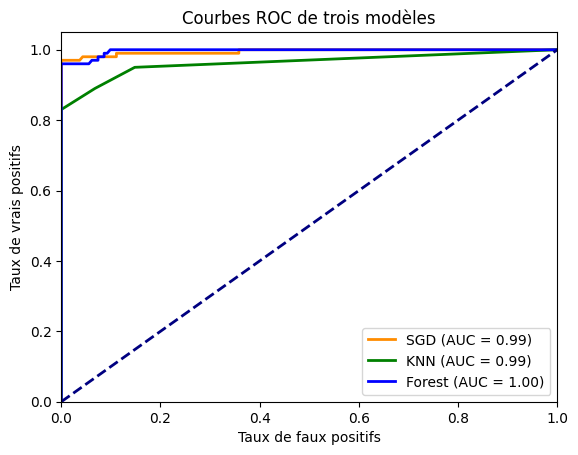

In [ ]:
# Obtenez les probabilités prédites pour les exemples de test
y_scores_reg = pipeline_reg_logi.predict_proba(X_test)[:, 1]
y_scores_knn= pipeline_knn.predict_proba(X_test)[:, 1]
y_scores_rdm_forest= pipeline_rdm_forest.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr_reg, tprreg, thresholdsreg = roc_curve(y_test, y_scores_reg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)
fpr_rdm_forest, tpr_rdm_forest, thresholds_rdm_forest = roc_curve(y_test, y_scores_rdm_forest)

# Calculez l'AUC (aire sous la courbe ROC)
roc_auc_reg = roc_auc_score(y_test, y_scores_reg)
roc_auc_knn = roc_auc_score(y_test, y_scores_knn)
roc_auc_rdm_forest = roc_auc_score(y_test,y_scores_rdm_forest)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_reg, tprreg, color='darkorange', lw=2, label='SGD (AUC = %0.2f)' % roc_auc_reg)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_reg)
plt.plot(fpr_rdm_forest, tpr_rdm_forest, color='blue', lw=2, label='Forest (AUC = %0.2f)' % roc_auc_rdm_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC de trois modèles')
plt.legend(loc="lower right")
plt.show()

Manque de données pour avoir des belles courbes
=> utiliser cross validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Utilisez make_scorer pour définir le rappel comme métrique de score
scorer = make_scorer(recall_score, pos_label=1)  # Assurez-vous de spécifier le pos_label approprié

# Effectuez la validation croisée en utilisant le rappel comme métrique
recall_scores_reg = cross_val_score(pipeline_reg_logi,data_without_name_body_cabin_ticket , y, cv=cv, scoring=scorer)
recall_scores_knn = cross_val_score(pipeline_knn,data_without_name_body_cabin_ticket , y, cv=cv, scoring=scorer)
recall_scores_rdm_forest = cross_val_score(pipeline_rdm_forest,data_without_name_body_cabin_ticket , y, cv=cv, scoring=scorer)


mean_recall_reg = recall_scores_reg.mean()
mean_recall_knn = recall_scores_knn.mean()
mean_recall_rdm_forest = recall_scores_rdm_forest.mean()

print("Rappel moyen de la régression logique sur toutes les validations croisées:", mean_recall_reg)
print("Rappel moyen de KNN sur toutes les validations croisées:", mean_recall_knn)
print("Rappel moyen de Random FOrest toutes les validations croisées:", mean_recall_rdm_forest)


Rappel moyen de la régression logique sur toutes les validations croisées: 0.9540000000000001
Rappel moyen de KNN sur toutes les validations croisées: 0.8160000000000001
Rappel moyen de Random FOrest toutes les validations croisées: 0.96
